In [1]:
# !pip install pydotplus
# !pip install graphviz
# !pip install pydot
# !pip install tensorflow==2.4.1

Problem 1: CNN for Image Classification Using your preferred machine learning  library, train a small convolutional network (CNN) to classify images 
from the CIFAR10 dataset. Note that most libraries have utility functions to download and load this dataset  (TensorFlow, PyTorch, keras).
Using the API for loading the dataset will readily divide it into training and testing sets. Randomly sample 20% of the training set and use that as your new training set for the purposes of this problem. Use the test set for 
validation. Implement the following in one .ipynb with all the output shown (already run).


In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D , MaxPool2D, Dense, Flatten, Dropout,BatchNormalization,Activation
import numpy as np

2.4.1


In [3]:
# Plotting Accuracy
def plot_accuracy(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'], marker = 'o')
  plt.plot(history.history['val_accuracy'], marker = 'o')
  plt.title('model accuracy vs epoch')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

# Plotting Loss
def plot_loss(history):
  # summarize history for loss
  plt.plot(history.history['loss'],marker = 'o')
  plt.plot(history.history['val_loss'], marker = 'o')
  plt.title('model loss vs epoch')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [4]:
import keras
import pydotplus
import pydot
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

In [5]:
#API for loading the dataset and dividing it into training and testing sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [6]:
# Convert into Greyscale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
# Plotting Images
def plot_data():
  y_label = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_label[y_train[i][0]])
plt.show()

In [8]:
# Normalize pixel values to be between 0 and 1
x_train= x_train / 255
x_test= x_test/ 255

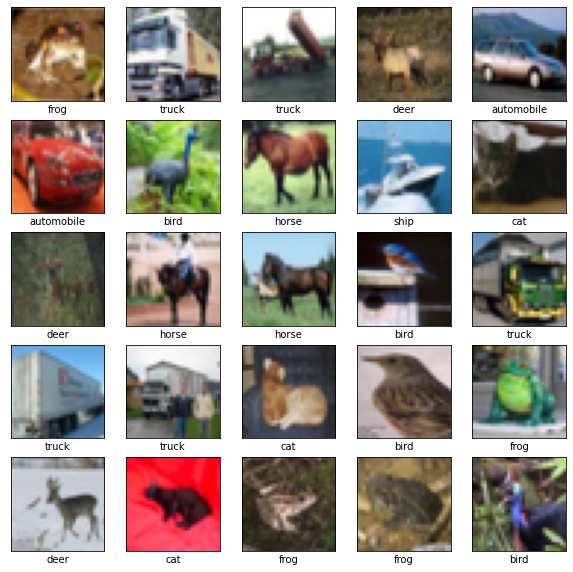

In [9]:
plot_data()

In [10]:
type(y_train)

numpy.ndarray

1- MLP: Build a multi-layer perceptron with the following layers:

• Fully connected layer with 512 units and a sigmoid activation function

• Fully connected layer with 512 units and a sigmoid activation function

• Output layer with the suitable activation function and number of neurons for the classification task


In [11]:
num_classes=len(np.unique(y_train))

In [12]:
# Printing the shape of train and test data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [13]:
# Randomly sample 20% of the training set and Named it as X_train_small
# X_train_small was taken as training set for the purposes of this problem

from sklearn.model_selection import train_test_split
X_train_L, X_train_S, y_train_L, y_train_S = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [14]:
# Convert target classes to categorical ones
y_train_new = to_categorical(y_train_S, num_classes)
y_test_new = to_categorical(y_test, num_classes)
x_train_new = X_train_S.reshape(-1, 3072)
x_test_new = x_test.reshape(-1, 3072)

In [15]:
# Printing the shape of train and test data
print(x_train_new.shape)
print(y_test_new.shape)
print(x_test_new.shape)
print(y_test_new.shape)

(10000, 3072)
(10000, 10)
(10000, 3072)
(10000, 10)


In [16]:
# Set the input shape
input_shape = (x_train_new.shape[1],)
print(f'Feature shape: {input_shape}')

# Create the model
mlp_model = Sequential()
# adding dense layer having 512 neurons
mlp_model.add(Dense(512, input_shape=input_shape, activation='sigmoid'))
# adding another dense layer having 512 neurons
mlp_model.add(Dense(512, input_shape=input_shape, activation='sigmoid'))
# adding dense layer having neurons which is equal to number of classes for output layer
mlp_model.add(Dense(num_classes, activation='softmax'))


Feature shape: (3072,)


In [17]:
# Configure the model and start training
mlp_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# printing model summary
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Optimizer: Here adam optimizer has been used. 
# Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks.
history_mlp_model= mlp_model.fit(x_train_new, y_train_new, epochs=5, batch_size=32, verbose=1,validation_data=(x_test_new, y_test_new))#validation_split=0.2

Epoch 1/5
313/313 [==============================] - 7s 16ms/step - loss: 2.1761 - accuracy: 0.2009 - val_loss: 1.9133 - val_accuracy: 0.2815
Epoch 2/5
313/313 [==============================] - 5s 16ms/step - loss: 1.9101 - accuracy: 0.2926 - val_loss: 1.8945 - val_accuracy: 0.3156
Epoch 3/5
313/313 [==============================] - 5s 16ms/step - loss: 1.8412 - accuracy: 0.3255 - val_loss: 1.8701 - val_accuracy: 0.3062
Epoch 4/5
313/313 [==============================] - 5s 16ms/step - loss: 1.8045 - accuracy: 0.3399 - val_loss: 1.7795 - val_accuracy: 0.3495
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 1.7671 - accuracy: 0.3569 - val_loss: 1.8348 - val_accuracy: 0.3290


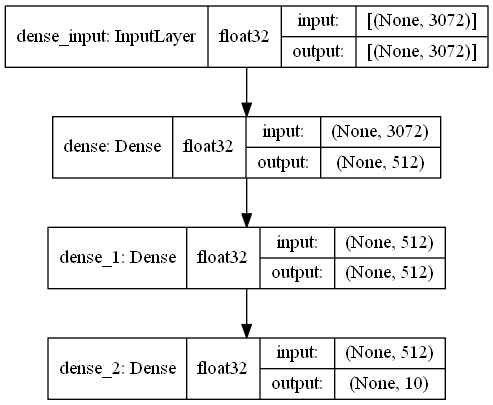

In [20]:
plot_model(mlp_model, show_shapes=True, show_dtype=True, expand_nested=True,to_file='cnn2_model.png') 

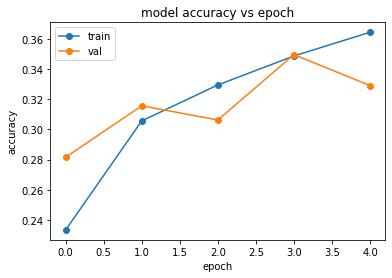

In [21]:
plot_accuracy(history_mlp_model)

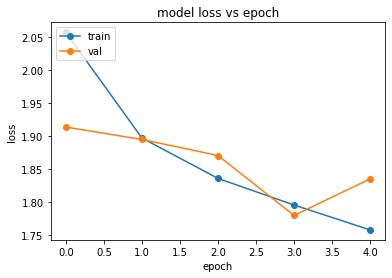

In [22]:
plot_loss(history_mlp_model)

### 2- CNN1

2- CNN1: Build a Convolutional neural network with the following architecture:

• 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function

• 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function

• Fully connected (Dense) layer with 512 units and a sigmoid activation function

• Fully connected layer with 512 units and a sigmoid activation function

• Output layer with the suitable activation function and number of neurons for the classification 
task


In [23]:
cnn1_model = Sequential()
#Adding CNN filters
cnn1_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn1_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Flattening to arrange the 3D volume of numbers into a 1D vector.
cnn1_model.add(layers.Flatten())
#adding dense layer
cnn1_model.add(layers.Dense(512, activation='sigmoid'))
cnn1_model.add(layers.Dense(512, activation='sigmoid'))
cnn1_model.add(layers.Dense(10))

In [24]:
cnn1_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 25,997,130
Trainable params: 25,997,130
Non-trainable params: 0
__________________________________________

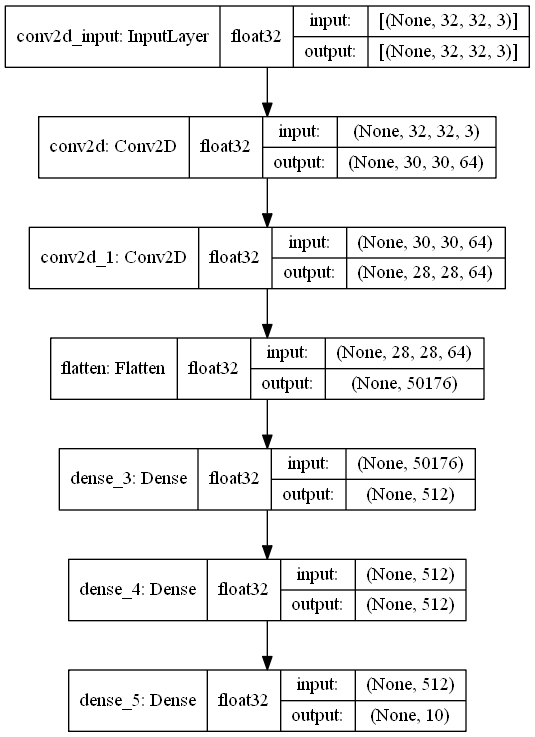

In [25]:
plot_model(cnn1_model, show_shapes=True, show_dtype=True, expand_nested=True, to_file='cnn1_model.png')

In [26]:
cnn1_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history_cnn1_model = cnn1_model.fit(x_train, y_train, epochs=5, batch_size=32,  validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 401s 255ms/step - loss: 1.6148 - accuracy: 0.4120 - val_loss: 1.0834 - val_accuracy: 0.6140
Epoch 2/5
1563/1563 [==============================] - 407s 261ms/step - loss: 0.9316 - accuracy: 0.6696 - val_loss: 0.9912 - val_accuracy: 0.6490
Epoch 3/5
1563/1563 [==============================] - 418s 267ms/step - loss: 0.5736 - accuracy: 0.8023 - val_loss: 1.0343 - val_accuracy: 0.6641
Epoch 4/5
1563/1563 [==============================] - 412s 263ms/step - loss: 0.2599 - accuracy: 0.9159 - val_loss: 1.2245 - val_accuracy: 0.6644
Epoch 5/5
1563/1563 [==============================] - 388s 248ms/step - loss: 0.0962 - accuracy: 0.9713 - val_loss: 1.5312 - val_accuracy: 0.6607


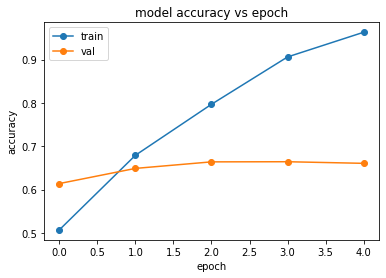

In [27]:
plot_accuracy(history_cnn1_model)

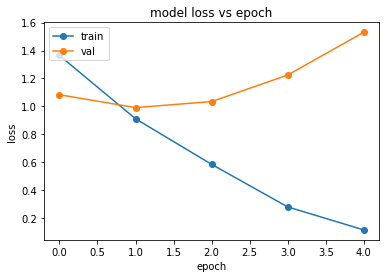

In [28]:
plot_loss(history_cnn1_model)

### 3- CNN2

3- CNN2: Build a Convolutional Neural network with the following architecture:

• 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function

• 2x2 Max pooling layer

• 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function

• 2x2 Max pooling layer

• Fully connected layer with 512 units and a sigmoid activation function

• Dropout layer with 0.2 dropout rate

• Fully connected layer with 512 units and a sigmoid activation function

• Dropout layer with 0.2 dropout rate

• Output layer with the suitable activation function and number of neurons for the classification 
task

In [29]:
cnn2_model = Sequential()
#Adding CNN filters
cnn2_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn2_model.add(layers.MaxPooling2D((2, 2)))
cnn2_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn2_model.add(layers.MaxPooling2D((2, 2)))
#Flattening to arrange the 3D volume of numbers into a 1D vector.
cnn2_model.add(layers.Flatten())
cnn2_model.add(layers.Dense(512, activation='sigmoid'))
#adding dense layer
cnn2_model.add(Dropout(0.2))
cnn2_model.add(layers.Dense(512, activation='sigmoid'))
# Dropout to prevent overfitting
cnn2_model.add(Dropout(0.2))
cnn2_model.add(layers.Dense(10))

In [30]:
cnn2_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dropout (Dropout)            (None, 512)              

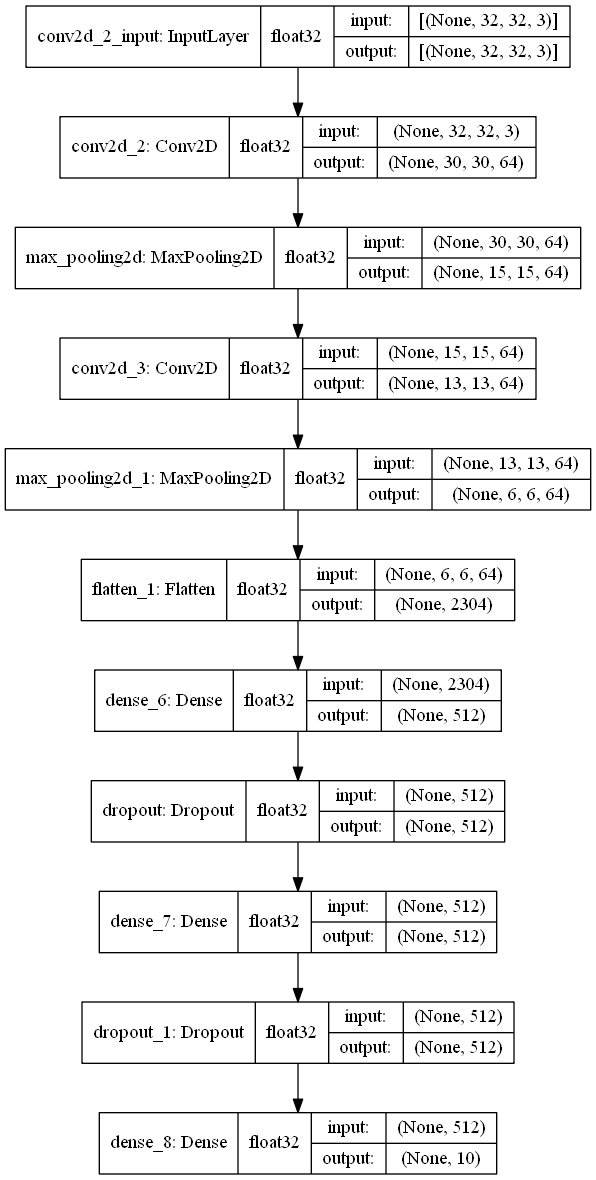

In [31]:
plot_model(cnn2_model, show_shapes=True, show_dtype=True, expand_nested=True,to_file='cnn2_model.png') 

In [32]:
cnn2_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_cnn2_model = cnn1_model.fit(x_train, y_train, epochs=5,batch_size=32,  validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 378s 242ms/step - loss: 0.0839 - accuracy: 0.9722 - val_loss: 1.7110 - val_accuracy: 0.6569
Epoch 2/5
1563/1563 [==============================] - 372s 238ms/step - loss: 0.0692 - accuracy: 0.9759 - val_loss: 1.7874 - val_accuracy: 0.6556
Epoch 3/5
1563/1563 [==============================] - 374s 239ms/step - loss: 0.0526 - accuracy: 0.9817 - val_loss: 1.9481 - val_accuracy: 0.6524
Epoch 4/5
1563/1563 [==============================] - 372s 238ms/step - loss: 0.0528 - accuracy: 0.9822 - val_loss: 1.9827 - val_accuracy: 0.6352
Epoch 5/5
1563/1563 [==============================] - 384s 246ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 2.1411 - val_accuracy: 0.6455


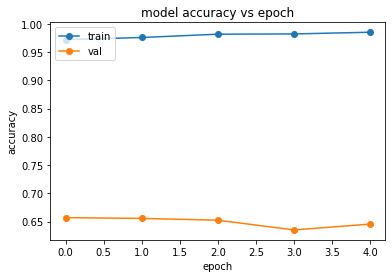

In [33]:
plot_accuracy(history_cnn2_model)

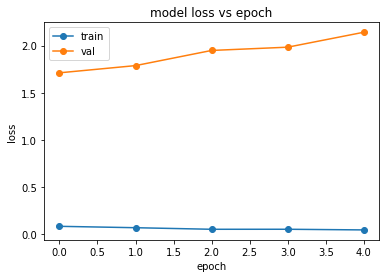

In [34]:

plot_loss(history_cnn2_model)

• Change the number of layers and the number of neurons per layer in the MLP, plot/tabulate the training and validation accuracies and comment on the results.

### MLP Model_2
Changing the number of layer</br>
Increasing the number of hidden layer

In [35]:
mlp2_model = Sequential()
mlp2_model.add(Dense(512, input_dim=3072 ,activation='sigmoid'))
mlp2_model.add(Dense(512, activation='sigmoid'))
mlp2_model.add(Dense(512, activation='sigmoid'))
mlp2_model.add(Dense(10,activation='softmax'))

In [36]:
mlp2_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 2,103,818
Trainable params: 2,103,818
Non-trainable params: 0
_________________________________________________________________


In [37]:
mlp2_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
# history_mlp2_model = mlp2_model.fit(x_train, y_train, epochs=5,batch_size=32,  validation_data=(x_test, y_test))
history_mlp2_model= mlp2_model.fit(x_train_new, y_train_new, epochs=5, batch_size=32, verbose=1,validation_data=(x_test_new, y_test_new))

Epoch 1/5
313/313 [==============================] - 19s 55ms/step - loss: 2.2701 - accuracy: 0.1434 - val_loss: 2.0324 - val_accuracy: 0.2205
Epoch 2/5
313/313 [==============================] - 5s 17ms/step - loss: 1.9945 - accuracy: 0.2523 - val_loss: 1.9127 - val_accuracy: 0.2883
Epoch 3/5
313/313 [==============================] - 5s 17ms/step - loss: 1.9233 - accuracy: 0.2870 - val_loss: 1.8903 - val_accuracy: 0.3024
Epoch 4/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8731 - accuracy: 0.3094 - val_loss: 2.0153 - val_accuracy: 0.2684
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8445 - accuracy: 0.3138 - val_loss: 1.8624 - val_accuracy: 0.2949


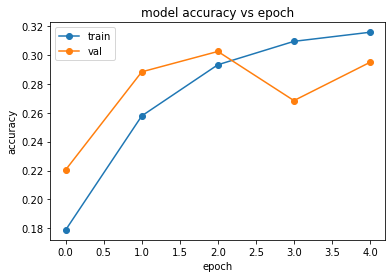

In [39]:
plot_accuracy(history_mlp2_model)

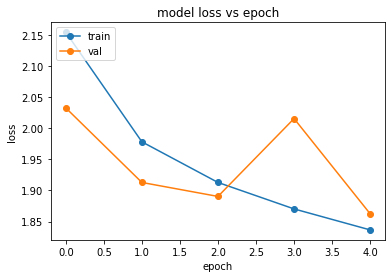

In [40]:
plot_loss(history_mlp2_model)

### MLP Model_3
Changing the number of neurons</br>
Increasing the number of neurons


In [41]:
mlp3_model = Sequential()
mlp3_model.add(Dense(1024, input_shape=input_shape, activation='sigmoid'))
mlp3_model.add(Dense(1024, input_shape=input_shape, activation='sigmoid'))
mlp3_model.add(Dense(num_classes, activation='softmax'))

In [42]:
mlp3_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 4,206,602
Trainable params: 4,206,602
Non-trainable params: 0
_________________________________________________________________


In [43]:
mlp3_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
# history_mlp3_model = mlp3_model.fit(x_train, y_train, epochs=5,batch_size=32,validation_data=(x_test, y_test))
history_mlp3_model= mlp3_model.fit(x_train_new, y_train_new, epochs=5, batch_size=32, verbose=1,validation_data=(x_test_new, y_test_new))

Epoch 1/5
313/313 [==============================] - 13s 40ms/step - loss: 2.2447 - accuracy: 0.1865 - val_loss: 1.9453 - val_accuracy: 0.2853
Epoch 2/5
313/313 [==============================] - 11s 37ms/step - loss: 1.9453 - accuracy: 0.2935 - val_loss: 1.8770 - val_accuracy: 0.3178
Epoch 3/5
313/313 [==============================] - 12s 38ms/step - loss: 1.8361 - accuracy: 0.3261 - val_loss: 1.9047 - val_accuracy: 0.3054
Epoch 4/5
313/313 [==============================] - 12s 37ms/step - loss: 1.8104 - accuracy: 0.3423 - val_loss: 1.8082 - val_accuracy: 0.3389
Epoch 5/5
313/313 [==============================] - 12s 37ms/step - loss: 1.7895 - accuracy: 0.3463 - val_loss: 1.9282 - val_accuracy: 0.2953


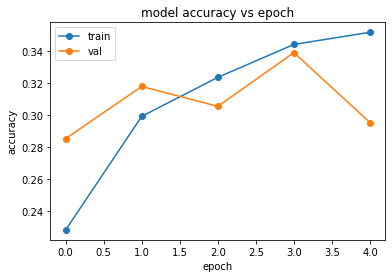

In [45]:
plot_accuracy(history_mlp3_model)

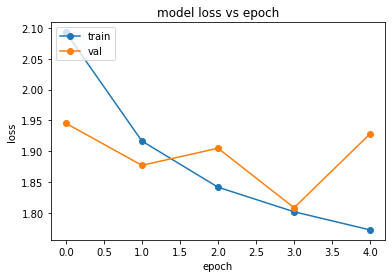

In [46]:
plot_loss(history_mlp3_model)

### MLP Model_4
Changing the number of neurons and layer</br>
Increasing the number of neurons and layer

In [47]:
mlp4_model = Sequential()
mlp4_model.add(Dense(1024, input_shape=input_shape, activation='sigmoid'))
mlp4_model.add(Dense(1024, input_shape=input_shape, activation='sigmoid'))
mlp4_model.add(Dense(1024, input_shape=input_shape, activation='sigmoid'))
mlp4_model.add(Dense(num_classes, activation='softmax'))

In [48]:
mlp4_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                10250     
Total params: 5,256,202
Trainable params: 5,256,202
Non-trainable params: 0
_________________________________________________________________


In [49]:
mlp4_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
# history_mlp4_model = mlp4_model.fit(x_train, y_train, epochs=5,batch_size=32,validation_data=(x_test, y_test))
history_mlp4_model= mlp4_model.fit(x_train_new, y_train_new, epochs=5, batch_size=32, verbose=1,validation_data=(x_test_new, y_test_new))

Epoch 1/5
313/313 [==============================] - 16s 50ms/step - loss: 2.3909 - accuracy: 0.1164 - val_loss: 2.0445 - val_accuracy: 0.2355
Epoch 2/5
313/313 [==============================] - 14s 45ms/step - loss: 2.0692 - accuracy: 0.2189 - val_loss: 2.0135 - val_accuracy: 0.2144
Epoch 3/5
313/313 [==============================] - 14s 45ms/step - loss: 1.9730 - accuracy: 0.2549 - val_loss: 2.0260 - val_accuracy: 0.2375
Epoch 4/5
313/313 [==============================] - 14s 44ms/step - loss: 1.9330 - accuracy: 0.2660 - val_loss: 1.9853 - val_accuracy: 0.2665
Epoch 5/5
313/313 [==============================] - 14s 45ms/step - loss: 1.8946 - accuracy: 0.2823 - val_loss: 1.8433 - val_accuracy: 0.3263


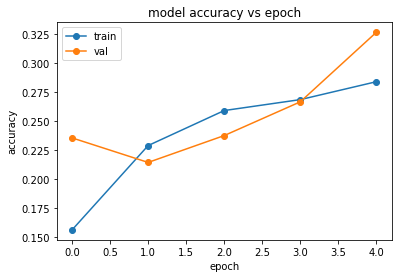

In [51]:
plot_accuracy(history_mlp4_model)

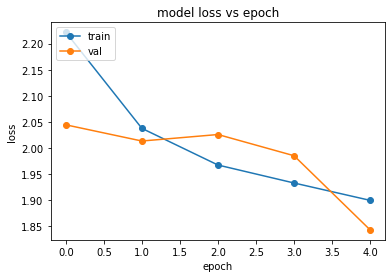

In [52]:
plot_loss(history_mlp4_model)

### MLP Model_5 
Changing the number of neurons</br>
Decreasing the number of neurons


In [53]:
mlp5_model = Sequential()
mlp5_model.add(Dense(256, input_shape=input_shape, activation='sigmoid'))
mlp5_model.add(Dense(256, input_shape=input_shape, activation='sigmoid'))
mlp5_model.add(Dense(num_classes, activation='softmax'))

In [54]:
mlp5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [55]:
mlp5_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
# history_mlp5_model = mlp5_model.fit(x_train, y_train, epochs=5,batch_size=32,  validation_data=(x_test, y_test))
history_mlp5_model= mlp5_model.fit(x_train_new, y_train_new, epochs=5, batch_size=32, verbose=1,validation_data=(x_test_new, y_test_new))

Epoch 1/5
313/313 [==============================] - 3s 9ms/step - loss: 2.1363 - accuracy: 0.2047 - val_loss: 1.9265 - val_accuracy: 0.3089
Epoch 2/5
313/313 [==============================] - 3s 10ms/step - loss: 1.9059 - accuracy: 0.3014 - val_loss: 1.8684 - val_accuracy: 0.3275
Epoch 3/5
313/313 [==============================] - 3s 9ms/step - loss: 1.8388 - accuracy: 0.3376 - val_loss: 1.8494 - val_accuracy: 0.3246
Epoch 4/5
313/313 [==============================] - 3s 10ms/step - loss: 1.8358 - accuracy: 0.3382 - val_loss: 1.8253 - val_accuracy: 0.3494
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 1.7740 - accuracy: 0.3557 - val_loss: 1.7908 - val_accuracy: 0.3424


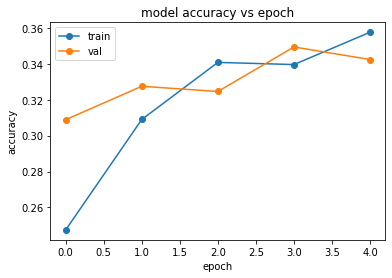

In [57]:
plot_accuracy(history_mlp5_model)

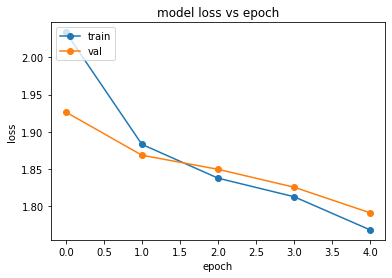

In [58]:
plot_loss(history_mlp5_model)

### MLP Model_6 
Changing the number of neurons and layer</br>
Decreasing the number of neurons and layer

In [59]:
mlp6_model = Sequential()
mlp6_model.add(Dense(256, input_shape=input_shape, activation='sigmoid'))
mlp6_model.add(Dense(num_classes, activation='softmax'))

In [60]:
mlp6_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [61]:
mlp6_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
# history_mlp6_model = mlp6_model.fit(x_train, y_train, epochs=5,batch_size=32,  validation_data=(x_test, y_test))
history_mlp6_model= mlp6_model.fit(x_train_new, y_train_new, epochs=5, batch_size=32, verbose=1,validation_data=(x_test_new, y_test_new))

Epoch 1/5
313/313 [==============================] - 3s 9ms/step - loss: 2.1800 - accuracy: 0.2180 - val_loss: 1.9293 - val_accuracy: 0.2935
Epoch 2/5
313/313 [==============================] - 3s 8ms/step - loss: 1.8849 - accuracy: 0.3207 - val_loss: 1.8793 - val_accuracy: 0.3307
Epoch 3/5
313/313 [==============================] - 3s 8ms/step - loss: 1.8158 - accuracy: 0.3511 - val_loss: 1.8202 - val_accuracy: 0.3403
Epoch 4/5
313/313 [==============================] - 2s 8ms/step - loss: 1.7642 - accuracy: 0.3623 - val_loss: 1.7849 - val_accuracy: 0.3568
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 1.7413 - accuracy: 0.3781 - val_loss: 1.7795 - val_accuracy: 0.3683


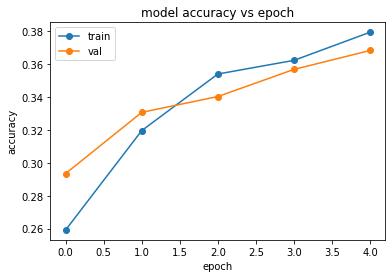

In [63]:
plot_accuracy(history_mlp6_model)

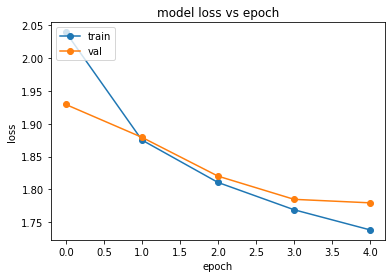

In [64]:
plot_loss(history_mlp6_model)

In [65]:
import pandas as pd
df=pd.DataFrame({'Model_1 accuracy':history_mlp_model.history['accuracy'],
                 'Model_1 Val_accuracy':history_mlp_model.history['val_accuracy'],
                 'Model_2 accuracy':history_mlp2_model.history['accuracy'],
                 'Model_2 Val_accuracy':history_mlp2_model.history['val_accuracy'],
                 'Model_3 accuracy':history_mlp3_model.history['accuracy'],
                 'Model_3 Val_accuracy':history_mlp3_model.history['val_accuracy'],
                 'Model_4 accuracy':history_mlp4_model.history['accuracy'],
                 'Model_4 Val_accuracy':history_mlp4_model.history['val_accuracy'],
                 'Model_5 accuracy':history_mlp5_model.history['accuracy'],
                 'Model_5 Val_accuracy':history_mlp5_model.history['val_accuracy'],
                 'Model_6 accuracy':history_mlp6_model.history['accuracy'], 
                 'Model_6 Val_accuracy':history_mlp6_model.history['val_accuracy']})

In [66]:
df

,Model_1 accuracy,Model_1 Val_accuracy,Model_2 accuracy,Model_2 Val_accuracy,Model_3 accuracy,Model_3 Val_accuracy,Model_4 accuracy,Model_4 Val_accuracy,Model_5 accuracy,Model_5 Val_accuracy,Model_6 accuracy,Model_6 Val_accuracy
0,0.2334,0.2815,0.1789,0.2205,0.2284,0.2853,0.1564,0.2355,0.2475,0.3089,0.2592,0.2935
1,0.3056,0.3156,0.2578,0.2883,0.2992,0.3178,0.2289,0.2144,0.3090,0.3275,0.3196,0.3307
2,0.3294,0.3062,0.2932,0.3024,0.3235,0.3054,0.2590,0.2375,0.3408,0.3246,0.3540,0.3403
3,0.3486,0.3495,0.3094,0.2684,0.3440,0.3389,0.2684,0.2665,0.3396,0.3494,0.3623,0.3568
4,0.3643,0.3290,0.3157,0.2949,0.3516,0.2953,0.2838,0.3263,0.3576,0.3424,0.3794,0.3683


Text(0, 0.5, 'Accuracy')

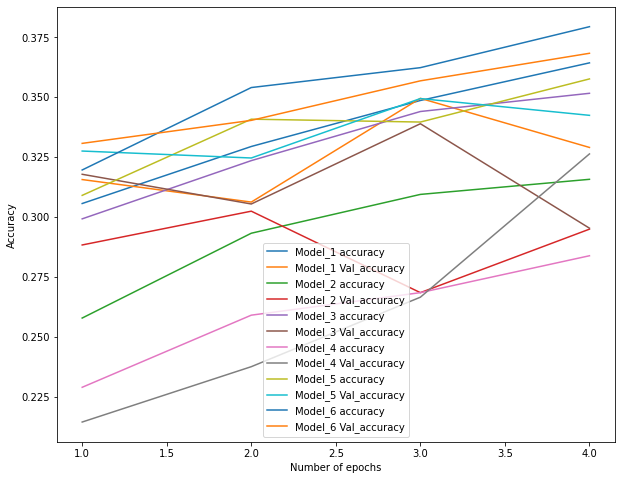

In [67]:
df[1:].plot.line(figsize=(10,8))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

In [68]:
df_acc = pd.DataFrame({'Model_1 accuracy':history_mlp_model.history['accuracy'],
                 'Model_2 accuracy':history_mlp2_model.history['accuracy'],
                 'Model_3 accuracy':history_mlp3_model.history['accuracy'],
                 'Model_4 accuracy':history_mlp4_model.history['accuracy'],
                 'Model_5 accuracy':history_mlp5_model.history['accuracy'],
                 'Model_6 accuracy':history_mlp6_model.history['accuracy']})

Text(0, 0.5, 'Accuracy')

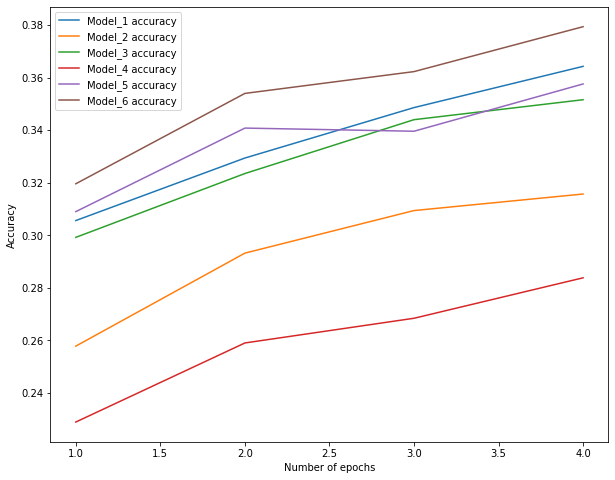

In [69]:
df_acc[1:].plot.line(figsize=(10,8))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

In [70]:
import pandas as pd
df_val=pd.DataFrame({'Model_1 Val_accuracy':history_mlp_model.history['val_accuracy'],
                 'Model_2 Val_accuracy':history_mlp2_model.history['val_accuracy'],
                 'Model_3 Val_accuracy':history_mlp3_model.history['val_accuracy'],
                 'Model_4 Val_accuracy':history_mlp4_model.history['val_accuracy'],
                 'Model_5 Val_accuracy':history_mlp5_model.history['val_accuracy'],
                 'Model_6 Val_accuracy':history_mlp6_model.history['val_accuracy']})

Text(0, 0.5, 'Validation Accuracy')

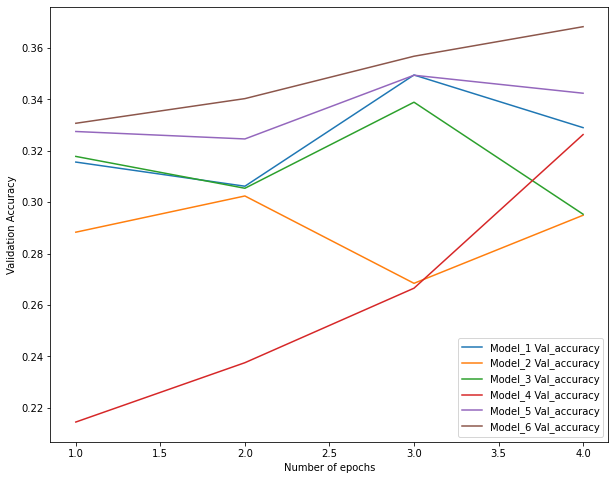

In [71]:
df_val[1:].plot.line(figsize=(10,8))
plt.xlabel('Number of epochs')
plt.ylabel('Validation Accuracy')

## Train and test accuracy for all three networks

In [72]:
df_acc_three=pd.DataFrame({
                 'MLP accuracy':history_mlp_model.history['accuracy'],\
                 'CNN1 accuracy':history_cnn1_model.history['accuracy'],\
                 'CNN2 accuracy':history_cnn2_model.history['accuracy']
                 })

Text(0, 0.5, 'Accuracy')

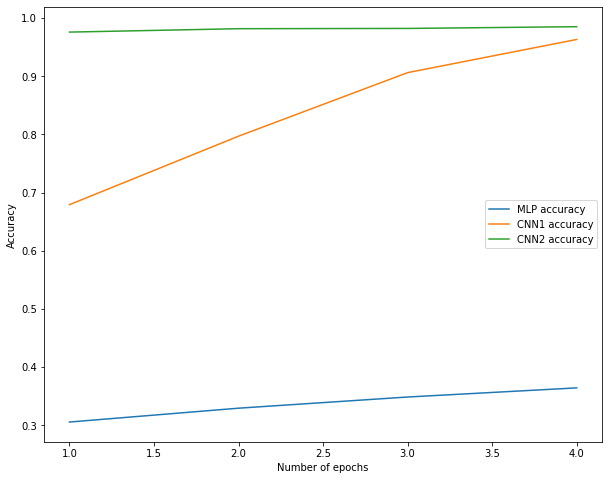

In [73]:
df_acc_three[1:].plot.line(figsize=(10,8))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

In [74]:
df_val_three=pd.DataFrame({
                 'MLP Val_accuracy':history_mlp_model.history['val_accuracy'],\
                 'CNN1 Val_accuracy':history_cnn1_model.history['val_accuracy'],\
                 'CNN2 Val_accuracy':history_cnn2_model.history['val_accuracy']
                 })

Text(0, 0.5, 'Validation Accuracy')

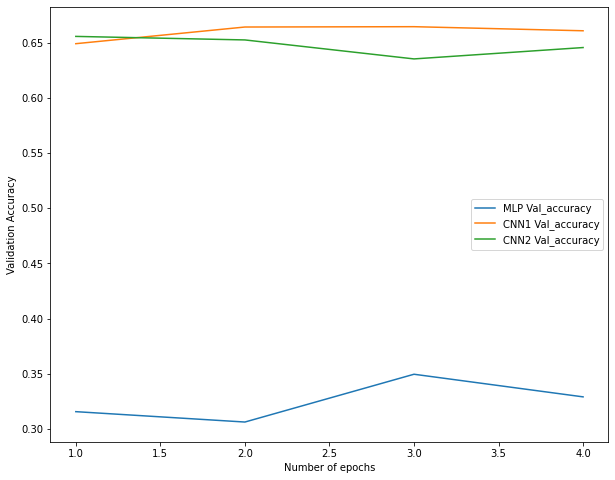

In [75]:
df_val_three[1:].plot.line(figsize=(10,8))
plt.xlabel('Number of epochs')
plt.ylabel('Validation Accuracy')

## Training and validation curves for the two CNNs

In [76]:
df_acc_val=pd.DataFrame({
                 'CNN1 accuracy':history_cnn1_model.history['accuracy'],
                 'CNN2 accuracy':history_cnn2_model.history['accuracy'],
                 'CNN1 Val_accuracy':history_cnn1_model.history['val_accuracy'],
                 'CNN2 Val_accuracy':history_cnn2_model.history['val_accuracy']
                 })

Text(0, 0.5, 'Accuracy')

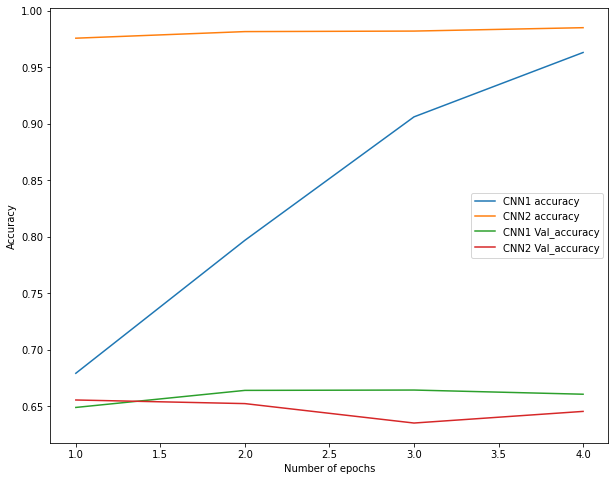

In [77]:
df_acc_val[1:].plot.line(figsize=(10,8))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')